In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("report.csv")
df.head()

,experiment_name,experiment_iteration,task_number,code_fix_count,code_syntax_status,obj_expected,obj_given,obj_status,sum_prompt_tokens,sum_completion_tokens,sum_prompt_tokens_price,sum_completion_tokens_price,sum_price
0,experiment_2a1,1,1,0,True,7.864000e+01,7.863760e+01,True,478,343,0.000072,0.000206,0.000277
1,experiment_2b1,1,1,0,True,7.864000e+01,7.863760e+01,True,478,373,0.000072,0.000224,0.000295
2,experiment_2a1,1,2,0,True,2.712500e+08,2.619524e+08,False,1193,903,0.000179,0.000542,0.000721
3,experiment_2a1,1,3,0,True,3.530000e+02,3.530000e+02,True,807,724,0.000121,0.000434,0.000555
4,experiment_2b1,1,2,0,True,2.712500e+08,2.619524e+08,False,1193,832,0.000179,0.000499,0.000678


In [97]:
experiment_efficiency = df.groupby(["experiment_name", "experiment_iteration"])[
                               "obj_status"].mean() * 100  #.sum() / 18 * 100
experiment_efficiency_std = experiment_efficiency.groupby("experiment_name").std()   

In [98]:

experiment_efficiency = experiment_efficiency.groupby("experiment_name").mean()

In [99]:

experiment_cost = df.groupby(["experiment_name", "experiment_iteration"])["sum_price"].mean()
experiment_cost_std = experiment_cost.groupby("experiment_name").std()   
experiment_cost = experiment_cost.groupby("experiment_name").mean()

In [100]:

experiment = pd.merge(experiment_efficiency, experiment_cost, on="experiment_name")

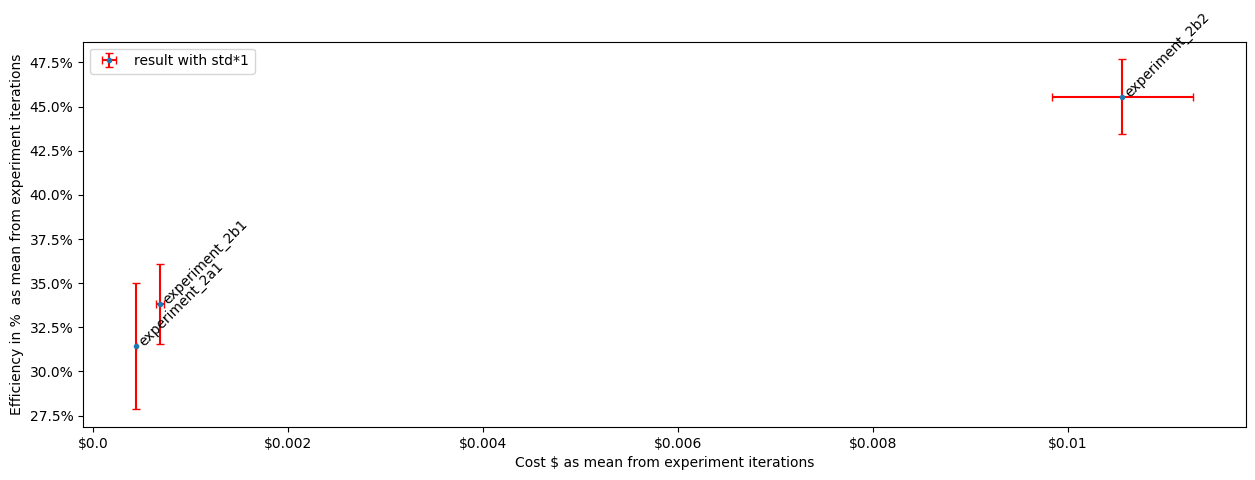

In [108]:

fig, ax = plt.subplots(figsize=(15, 5))
# ax.scatter(experiment["sum_price"], experiment["obj_status"], marker='x')
ax.set_xlabel("Cost $ as mean from experiment iterations")
ax.set_ylabel("Efficiency in %  as mean from experiment iterations")
for i, txt in enumerate(experiment.index):
    ax.annotate(txt, (experiment["sum_price"][i], experiment["obj_status"][i]), rotation=45)
    # rotate text
# add to x label $ sign to the number
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(round(x, 4))))
# add to y label % sign to the number
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(round(x, 1))))

ax.errorbar(experiment["sum_price"], experiment["obj_status"], xerr=experiment_cost_std.values, yerr=experiment_efficiency_std.values, fmt='.', capsize=3, ecolor='red')

plt.legend(["result with std*1"])
plt.show()